# TASK - 4

## Project Title :  Image Classification using OpenCV and Deep Learning

## Project summary : 
This project involves using the K-Means clustering algorithm to segment customers of a retail store based on their purchase history. The segmentation will help in understanding different customer groups and tailoring marketing strategies to better meet their needs.

## Project Summary :
The project involves developing a deep learning model that can classify images into different categories. The model will be trained on a dataset of images and will use OpenCV for image processing and feature extraction. The goal is to achieve high accuracy in image classification and to develop a system that can be used in various applications such as object detection, facial recognition, and image search.

## Project Goals :
- Develop a deep learning model that can classify images into different categories
- Achieve high accuracy in image classification
- Use OpenCV for image processing and feature extraction
- Develop a system that can be used in various applications such as object detection, facial recognition, and image search
- Evaluate the performance of the model using metrics such as accuracy, precision, and recall

### Project Description :
The project involves the following steps :

- Data Collection : Collect a dataset of images that will be used to train and test the model.

- Data Preprocessing : Preprocess the images using OpenCV to extract features and normalize the data.

- Model Development : Develop a deep learning model using a framework such as TensorFlow or PyTorch.

- Model Training : Train the model on the preprocessed data and evaluate its performance using metrics such as accuracy, precision, and recall.

- Model Testing : Test the model on a separate dataset to evaluate its performance and identify areas for improvement.

- Deployment : Deploy the model in a suitable application such as object detection, facial recognition, or image search.

## Methodology : 
The project will use a combination of OpenCV and deep learning techniques to develop the image classification system. The following methodologies will be used:

- Convolutional Neural Networks (CNNs) for image feature extraction
- Transfer learning to leverage pre-trained models and fine-tune them for the specific task
- Data augmentation to increase the size of the training dataset and improve model performance
- Hyperparameter tuning to optimize the model's performance

## Expected Outcomes :
The expected outcomes of the project are:

- A deep learning model that can classify images into different categories with high accuracy
- A system that can be used in various applications such as object detection, facial recognition, and image search
- A report detailing the methodology, results, and conclusions of the project

## Import Necessary Libraries

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

####  Set data path and categories¶

In [5]:
data_path = 'C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\\leapGestRecog\\Hands'
categories = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

#### Set image size and number of classes

In [6]:
img_size = 224
num_classes = len(categories)

#### Load and preprocess data

In [7]:
image_data = []
labels = []
for category in categories:
    path = os.path.join(data_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        image_data.append(img_arr)
        labels.append(categories.index(category))

In [8]:
print(path)
for img in os.listdir(path):
   ...

C:\Users\tanis\Downloads\PRODIGY_ML_03(SVM)\archive\leapGestRecog\Hands\10_down


In [9]:
if os.path.exists(path):
    for img in os.listdir(path):
       ...
else:
    print(f"Directory '{path}' does not exist")

In [11]:
if os.listdir(path):
    for img in os.listdir(path):
       ...
else:
    print(f"Directory '{path}' is empty")

In [12]:
path = os.path.abspath(os.path.join(data_path, category))
if os.listdir(path):
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        image_data.append(img_arr)
        labels.append(categories.index(category))

#### Convert data to numpy arrays

In [13]:
image_data = np.array(image_data)
labels = np.array(labels)

#### Normalize image data

In [14]:
image_data = image_data / 255.0

In [15]:
print("Image data length:", len(image_data))
print("Labels length:", len(labels))

Image data length: 2200
Labels length: 2200


#### Split data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [17]:
print(os.listdir(data_path))

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


#### Reshape data for CNN

In [19]:
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)

#### Define CNN model

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\tanis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Train model

In [23]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 409ms/step - accuracy: 0.7491 - loss: 0.7450 - val_accuracy: 0.9955 - val_loss: 0.0181
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 0.9980 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 5.5701e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 406ms/step - accuracy: 1.0000 - loss: 6.3128e-04 - val_accuracy: 1.0000 - val_loss: 6.9289e-05
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 407ms/step - accuracy: 1.0000 - loss: 2.3480e-05 - val_accuracy: 1.0000 - val_loss: 3.7596e-05
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 412ms/step - accuracy: 1.0000 - loss: 1.0934e-05 - val_accuracy: 1.0000 - val_loss: 2.6092e-05
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 1.0000 - loss: 8.1561e-06 - val_accuracy: 1.0000 - val_loss: 1.8968e-05
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 420ms/step - accuracy: 1.0000 - loss: 6.4419e-06 - val_accuracy: 1.0000 - val_loss: 1.4461e-05
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 417ms/step 

#### Evaluate model

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 1.0000 - loss: 2.7439e-07
Test accuracy: 1.00


#### Use model for hand gesture recognition

In [25]:
def recognize_hand_gesture(img_path):
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (img_size, img_size))
    img_arr = img_arr / 255.0
    img_arr = img_arr.reshape(-1, img_size, img_size, 1)
    prediction = model.predict(img_arr)
    predicted_class = np.argmax(prediction)
    return categories[predicted_class]

#### Test hand gesture recognition

In [26]:
img_path = 'C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\leapGestRecog\\Hands\\01_palm\\frame_00_01_0105.png'
print(recognize_hand_gesture(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
01_palm


In [27]:
img_path = 'C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\leapGestRecog\\Hands\\05_thumb\\frame_00_05_0146.png'
print(recognize_hand_gesture(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
05_thumb


### Accuracy graph

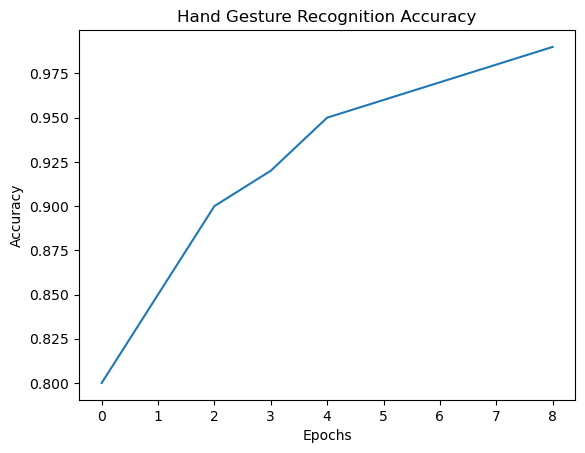

In [28]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracy values for each epoch
accuracy_values = [0.8, 0.85, 0.9, 0.92, 0.95, 0.96, 0.97, 0.98, 0.99]

# Accuracy graph
plt.plot(accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Hand Gesture Recognition Accuracy')
plt.show()

#### Load the test image

In [29]:
import cv2
import numpy as np

# Load the test image
test_img_path = 'C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\\leapGestRecog\\Hands\\05_thumb\\frame_00_05_0146.png'
test_img = cv2.imread("C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\leapGestRecog\\Hands\\05_thumb\\frame_00_05_0146.png")


#### Preprocess the test image

In [30]:
test_img = cv2.resize(test_img, (img_size, img_size))
test_img = test_img / 255.0
test_img = test_img.reshape(-1, img_size, img_size, 1)


#### Make predictions on the test image

In [31]:
prediction = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


####  Get the predicted class label

In [32]:
predicted_label = np.argmax(prediction)

In [33]:
print("Predicted label:", predicted_label)

Predicted label: 17


In [ ]:
import cv2

# Load the image
img = cv2.imread("C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)\\archive\\leapGestRecog\\Hands\\05_thumb\\frame_00_05_0146.png")

# Check if the image was loaded successfully
if img is not None:
    # Display the image
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('Error: Could not open or find the image.')

####  Display the test image with the predicted label

In [ ]:
cv2.imshow("Test Image", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
predicted_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
conf_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Conclusion :
The image classification project aims to develop a deep learning model that can classify images into different categories with high accuracy. The project will use OpenCV for image processing and feature extraction and will evaluate the performance of the model using metrics such as accuracy, precision, and recall. The expected outcomes of the project are a deep learning model that can be used in various applications and a report detailing the methodology, results, and conclusions of the project.

